In [8]:
"""
Estimation
First-Order Continuous Transfer Function - Tclab

@author: Jeferson Gallego Chaverra
        Pedro Alejandro Sanchez Osorio
        Victor Alfonso Echeverri Moyano
"""
import numpy as np
import matplotlib.pyplot as plt
import control as cl
import math as ma
from sklearn.metrics import *
from Funtions import *

## Estimation
## First-Order Continuous Transfer Function (FOCTF)

## Upload Data

21 40
30.28


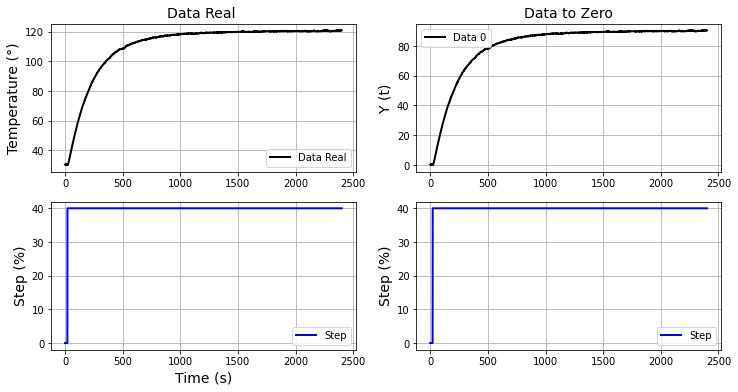

In [9]:
# Upload Data 
x =limites('DATA 1 OR 2?',1,2)

# Data
if x == 1:
     data = np.loadtxt('1.txt',delimiter=',',skiprows=1)
elif x == 2:
     data = np.loadtxt('2.txt',delimiter=',',skiprows=1)

# Tclab Data
t1 = data[:,0].T 
u1 = data[:,1].T
y1 = data[:,2].T

N = len(y1)
# U
U = int(u1[0])

# Time Zero and Step
for k in range(N):
    if(u1[k]!=U):
        T_Zero = int(t1[k])
        I = int(u1[k])
        print(T_Zero,I)
        break

# Y ---> Time Zero

Z = y1[T_Zero]
print(Z)
y2 = y1 - Z

# Graph
plt.figure(figsize=(12,6))

# Subplot Data
ax=plt.subplot(2,2,1)
ax.grid()
plt.title("Data Real ",fontsize = 14)
plt.plot(t1, y1, 'k', linewidth=2, label='Data Real')
plt.ylabel('Temperature (°)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
ax.grid()
plt.title("Data to Zero",fontsize = 14)
plt.plot(t1, y2, 'k', linewidth=2, label='Data 0')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

# Subplot Step          
ax=plt.subplot(2,2,3)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.legend(loc='best')
plt.show()

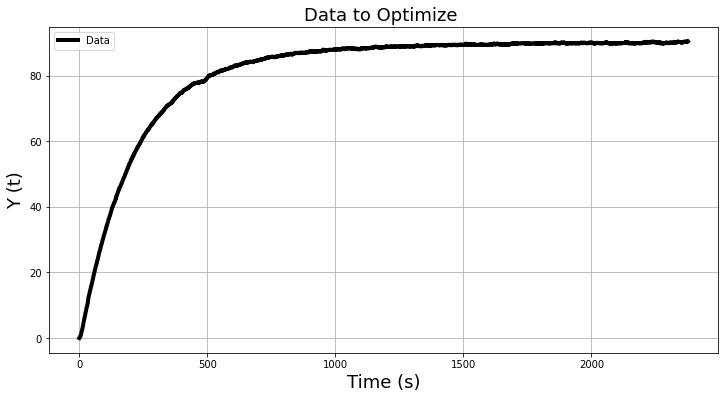

In [10]:
# Simulation Time 
t0 = data[T_Zero:,0].T 
tf = len(t0) - 1
dt = 1
t = np.linspace(0,tf,int(tf/dt)+1)

# Vector Y (t)
y = y2[T_Zero:]

# Iterations
N=len(y)
       
plt.figure(figsize=(12,6))
plt.title("Data to Optimize ",fontsize = 18)
plt.plot(t, y, 'k', linewidth=4, label='Data')
plt.ylabel('Y (t)', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 18)
plt.legend(loc='best')
plt.grid()


**1:** 

Time of 63.2% Final Value = $\tau$

$t_s = 4\tau$

In [11]:
yf = 0
i1 = 0
i2 = 0
tau = 0

# Final Value
V = y[-1]

# 63.2% Final Value 
V6 = 0.632*V

# Calculation of Tau and Settling time
for k in range(N):
    if(y[k]>=V6):
        tau = t[k]
        break
# ts 
ts = 4*tau

#  Y Final
for j in range(N-k):
    if(t[j]>ts):
        i1 = j+k
        yf = yf+y[i1]
        i2 = i2+1

# Final Y
yf = yf/i2

# K 
Kf = (yf)/(I-U)

print(f" K: {Kf:.4f} - Tau: {tau} - Tss: {ts}")

 K: 2.2420 - Tau: 221.0 - Tss: 884.0


G(s) =     
  2.242
---------
221 s + 1

Mean Squared Error              =  0.3607
Root Mean Squared Error         =  0.6006
Mean Absolute Error             =  0.4880
Mean Absolute Percentage Error  =  0.0190
R2                              =  0.9988
MAX Error                       =  2.0496


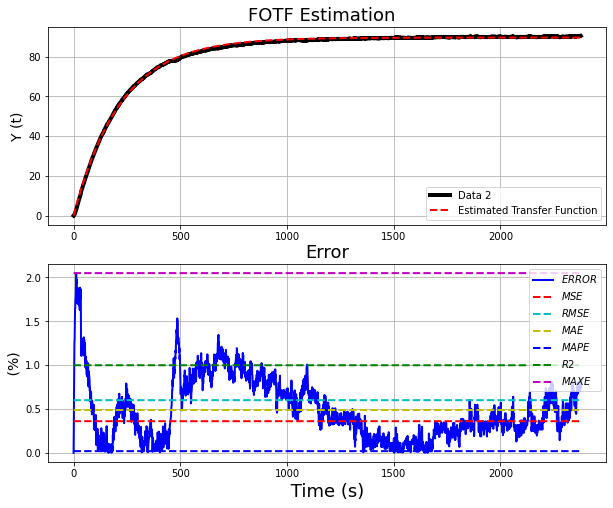

In [14]:
# Approximate Transfer Function:
Ge = cl.tf([Kf],[tau,1])

# Step Response 
_,ye = cl.step_response(Ge,t)

# Final Ye
if x==1:
     ye = ye * 25
elif x == 2:
     ye = ye * 40

# Error
e = np.abs(y - ye)

# Evaluation Criteria 
MSE = mean_squared_error(y[0:len(ye)], ye[0:len(ye)])
RMSE=ma.sqrt(MSE)
MAE = mean_absolute_error(y[0:len(ye)], ye[0:len(ye)])
MAPE = mean_absolute_percentage_error(y[0:len(ye)], ye[0:len(ye)])
R2 = r2_score(y[0:len(ye)], ye[0:len(ye)])
MAXE = max_error(y[0:len(ye)], ye[0:len(ye)])

# Print
print(f"G(s) =     {Ge}") 
print(f"Mean Squared Error              =  {MSE:.4f}")
print(f"Root Mean Squared Error         =  {RMSE:.4f}")
print(f"Mean Absolute Error             =  {MAE:.4f}")
print(f"Mean Absolute Percentage Error  =  {MAPE:.4f}")
print(f"R2                              =  {R2:.4f}")
print(f"MAX Error                       =  {MAXE:.4f}")

# Graph
mse = np.ones(int(len(t)))*MSE 
rmse = np.ones(int(len(t)))*RMSE
mae = np.ones(int(len(t)))*MAE 
mape = np.ones(int(len(t)))*MAPE 
r2 = np.ones(int(len(t)))*R2 
maxe = np.ones(int(len(t)))*MAXE 

# Plot
plt.figure(figsize=(10,8))

ax=plt.subplot(2,1,1)
ax.grid()
plt.title("FOTF Estimation  ",fontsize = 18)
plt.plot(t,y, 'k', linewidth=4, label='Data')
plt.plot(t,ye, 'r--'  , linewidth=2, label='Estimated Transfer Function')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
ax.grid()
plt.title("Error",fontsize = 18)
plt.plot(t,e,  'b-'  , linewidth=2, label=r'$ERROR$')
plt.plot(t,mse,  'r--'  , linewidth=2, label=r'$MSE$')
plt.plot(t,rmse,  'c--'  , linewidth=2, label=r'$RMSE$')
plt.plot(t,mae,  'y--'  , linewidth=2, label=r'$MAE$')
plt.plot(t,mape,  'b--'  , linewidth=2, label=r'$MAPE$')
plt.plot(t,r2,  'g--'  , linewidth=2, label=r'$R2$')
plt.plot(t,maxe,  'm--'  , linewidth=2, label=r'$MAXE$')
plt.ylabel(' (%) ', fontsize = 14)
plt.xlabel(' Time (s) ', fontsize = 18)
plt.legend(loc='best')

In [13]:
"""
Data 1: 20 % Step

Ge =     
  2.259
---------
239 s + 1

Mean Squared Error              =  0.3843
Root Mean Squared Error         =  0.6199
Mean Absolute Error             =  0.4851
Mean Absolute Percentage Error  =  0.0302
R2                              =  0.9970
MAX Error                       =  2.1331

Data 2: 40 % Step

Ge =     
  2.242
---------
221 s + 1

Mean Squared Error              =  0.3607
Root Mean Squared Error         =  0.6006
Mean Absolute Error             =  0.4880
Mean Absolute Percentage Error  =  0.0190
R2                              =  0.9988
MAX Error                       =  2.0496

"""

'\nData 1: 20 % Step\n\nGe =     \n  2.259\n---------\n239 s + 1\n\nMean Squared Error              =  0.3843\nRoot Mean Squared Error         =  0.6199\nMean Absolute Error             =  0.4851\nMean Absolute Percentage Error  =  0.0302\nR2                              =  0.9970\nMAX Error                       =  2.1331\n\nData 2: 40 % Step\n\nGe =     \n  2.242\n---------\n221 s + 1\n\nMean Squared Error              =  0.3607\nRoot Mean Squared Error         =  0.6006\nMean Absolute Error             =  0.4880\nMean Absolute Percentage Error  =  0.0190\nR2                              =  0.9988\nMAX Error                       =  2.0496\n\n'